In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity


In [ ]:
from pymongo import MongoClient
import urllib.parse

username = urllib.parse.quote_plus('jayantj1j')

mypass=input("enter password")
password = urllib.parse.quote_plus(mypass)
client=MongoClient("mongodb://%s:%s@mflix-shard-00-00-sgqip.mongodb.net:27017,mflix-shard-00-01-sgqip.mongodb.net:27017,mflix-shard-00-02-sgqip.mongodb.net:27017/mflix?ssl=true&replicaSet=mflix-shard-0&authSource=admin&retryWrites=true" % (username, password))
print(client.imdb)
collection = client.imdb
data = pd.DataFrame(list(collection.mflix.imdb.find()))

data


In [ ]:
import pymongo
import pandas as pd
from pymongo import MongoClient
client = MongoClient()
db = client.database_name
collection = db.collection_name
data = pd.DataFrame(list(collection.find()))

In [3]:
mov=pd.read_csv("C:\\Users\\Jayant\\Desktop\\precog\\precog_imdb300.csv")
del mov["Unnamed: 0"]

In [4]:
mov.head()

,genres,imdb,imdb_id,metascore,movid,movie,plot,votes,year
0,"['Biography', 'Drama', 'Sport']",7.6,1210166,87,89492,Moneyball (2011),Oakland A's general manager Billy Beane's succ...,320711,2011
1,"['Adventure', 'Drama', 'Horror']",5.7,374102,63,27822,Open Water (2003),Based on the true story of two scuba divers ac...,47529,2003
2,"['Comedy', 'Drama']",7.7,268126,83,5902,Adaptation. (2002),A lovelorn screenwriter becomes desperate as h...,163178,2002
3,"['Documentary', 'Crime']",8.4,1313104,84,71462,The Cove (2009),"Using state-of-the-art equipment, a group of a...",44744,2009
4,"['Comedy', 'Romance']",6.4,2784678,81,118924,Top Five (2014),A comedian tries to make it as a serious actor...,24539,2014


In [355]:
mov[mov['movie']=='Moneyball (2011)']['genres']

0    ['Biography', 'Drama', 'Sport']
Name: genres, dtype: object

In [4]:
del mov['Unnamed: 0']


In [6]:
mov=mov[['movid','imdb_id','movie',
 
 'imdb',
 
 'metascore','year','genres',
 
 'plot',
 'votes',
 ]]

In [11]:
mov.head()

,movid,imdb_id,movie,imdb,metascore,year,genres,plot,votes
0,89492,1210166,Moneyball (2011),7.6,87,2011,"[Biography, Drama, Sport]",Oakland A's general manager Billy Beane's succ...,320711
1,27822,374102,Open Water (2003),5.7,63,2003,"[Adventure, Drama, Horror]",Based on the true story of two scuba divers ac...,47529
2,5902,268126,Adaptation. (2002),7.7,83,2002,"[Comedy, Drama]",A lovelorn screenwriter becomes desperate as h...,163178
3,71462,1313104,The Cove (2009),8.4,84,2009,"[Documentary, Crime]","Using state-of-the-art equipment, a group of a...",44744
4,118924,2784678,Top Five (2014),6.4,81,2014,"[Comedy, Romance]",A comedian tries to make it as a serious actor...,24539


In [ ]:
mov['genres']=mov['genres'].apply(ast.literal_eval)
#mov['genres'].apply(', '.join)
mov

In [8]:
import ast

In [51]:
#mov.to_csv('file_namejj.csv')


In [13]:
data=pd.read_csv("C:\\Users\\Jayant\\Desktop\\precog\\rearr_imdb300.csv")
del data['Unnamed: 0']
data['genres']=data['genres'].apply(ast.literal_eval)

data['genres']=data['genres'].apply(lambda x: ', '.join(x))
data.head()

,movid,imdb_id,movie,imdb,metascore,year,genres,plot,votes
0,89492,1210166,Moneyball (2011),7.6,87,2011,"Biography, Drama, Sport",Oakland A's general manager Billy Beane's succ...,320711
1,27822,374102,Open Water (2003),5.7,63,2003,"Adventure, Drama, Horror",Based on the true story of two scuba divers ac...,47529
2,5902,268126,Adaptation. (2002),7.7,83,2002,"Comedy, Drama",A lovelorn screenwriter becomes desperate as h...,163178
3,71462,1313104,The Cove (2009),8.4,84,2009,"Documentary, Crime","Using state-of-the-art equipment, a group of a...",44744
4,118924,2784678,Top Five (2014),6.4,81,2014,"Comedy, Romance",A comedian tries to make it as a serious actor...,24539


In [14]:
data['genres'][10].split(',')

['Drama', ' History']

In [15]:
a=set()
for i in range(300):
    temp= data['genres'][i].split(',')
    for j in range(len(temp)):
        #ll=temp[j].strip()
        a.add(temp[j].strip())
        
   

In [16]:
a

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [17]:
i_cols = ['movid', 'movie' ,'year', 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [18]:
features= pd.DataFrame({'movid':data.movid,'movie': data.movie,
                       'year': data.year
                       })
for x in a:
    
    features.insert(1,x, 0)

In [19]:
features.head()

,movid,Fantasy,Adventure,Western,Romance,Mystery,Documentary,Musical,History,Family,...,Thriller,Music,Sci-Fi,Action,War,Sport,Biography,Crime,movie,year
0,89492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Moneyball (2011),2011
1,27822,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Open Water (2003),2003
2,5902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Adaptation. (2002),2002
3,71462,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,The Cove (2009),2009
4,118924,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Top Five (2014),2014


In [20]:
#features=features[i_cols]
features.tail()

,movid,Fantasy,Adventure,Western,Romance,Mystery,Documentary,Musical,History,Family,...,Thriller,Music,Sci-Fi,Action,War,Sport,Biography,Crime,movie,year
295,50445,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,The Hitcher (2007),2007
296,141668,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,War Room (2015),2015
297,617,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,La flor de mi secreto (1995),1995
298,38992,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Two for the Money (2005),2005
299,4780,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Liam (2000),2000


In [21]:
for i in range(300):
    temp= data['genres'][i].split(',')
    for j in range(len(temp)):
        #ll=temp[j].strip()
        cc=temp[j].strip()
        features[cc][i]=1
        

C:\Users\Jayant\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [341]:
# features


In [221]:
5902 in list(features.movid)

True

In [23]:
users=pd.read_csv("C:\\Users\\Jayant\\Desktop\\precog\\ratings.csv")

In [394]:

users.head()


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [73]:
del users["timestamp"]

In [83]:
useronly130= pd.DataFrame(columns=['userid','movid',
                       'rating' ])


In [85]:
for i in range(0,100836):
    if users.userId[i] in idd:
        useronly130.loc[len(useronly130)] = list(users.iloc[i])  
        
        

In [90]:
useronly130.to_csv("useronly130.csv")

In [25]:
temp=[]
for i in range(300):
    temp.append(features['movid'][i])

In [26]:
userid={}
count=0
usertemp=1
for index, row in users.iterrows():
    if row['userId']!=usertemp:
        count=0
        usertemp=row['userId']
    
    if row['movieId'] in temp:
        count=count+1
        
    if count>=10 :
        userid[row['userId']]=count
        
    
        
    

In [27]:
import operator
sorted_topuser = sorted(userid.items(), key=operator.itemgetter(1),reverse=True)

In [28]:
finalusers=sorted_topuser[0:130]

In [53]:
idd=[int(finalusers[x][0]) for x in range(len(finalusers))]

In [329]:
userframe=pd.DataFrame(columns=list(features.movid))
                       

In [323]:
userframe.insert(loc=0, column="userid", value=idd)

In [324]:
userframe.shape

(130, 301)

In [325]:
#userframe = userframe.fillna(0)
userframe.head()

,userid,89492,27822,5902,71462,118924,109191,113345,8035,8835,...,5444,185473,4995,2887,56003,50445,141668,617,38992,4780
0,414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
userframe = userframe.set_index("userid", drop = False)

In [611]:
users.shape

(100836, 3)

In [ ]:
cc=0
for i in range(0,130):
    cc=cc+1
    temp_us=userframe["userid"][i]
    print(temp_us,cc)
    for index, info in users.iterrows():
        if temp_us==int(info["userId"]):
            
            userframe.set_value(i, info["movieId"],info["rating"])
            
            
            
        

In [396]:
features.head()

,movid,Fantasy,Adventure,Western,Romance,Mystery,Documentary,Musical,History,Family,...,Thriller,Music,Sci-Fi,Action,War,Sport,Biography,Crime,movie,year
0,89492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,Moneyball (2011),2011
1,27822,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Open Water (2003),2003
2,5902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Adaptation. (2002),2002
3,71462,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,The Cove (2009),2009
4,118924,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Top Five (2014),2014


In [397]:
features.rename(columns={"movid":"movieId"}, inplace=True)

In [400]:
movie_data = pd.merge(users,features, on='movieId')  


In [405]:
movie_data.groupby('movie')['rating'].mean().sort_values(ascending=False).head()  


movie
Moonlight (2016)                     5.00
I Can Do Bad All by Myself (2009)    5.00
Hellbenders (2012)                   5.00
Cherish (2002)                       5.00
Hunger (2008)                        4.75
Name: rating, dtype: float64

In [456]:
movie_data.groupby('movie')['rating'].count().sort_values(ascending=False).head()  


movie
The Lord of the Rings: The Two Towers (2002)    188
Aladdin (1992)                                  183
Memento (2000)                                  159
Good Will Hunting (1997)                        141
Kill Bill: Vol. 1 (2003)                        131
Name: rating, dtype: int64

In [455]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('movie')['rating'].mean())  
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('movie')['rating'].count())  
ratings_mean_count.head()
#ratings_mean_count.to_csv("rat_count.csv")


,rating,rating_counts
movie,,
10 Years (2011),3.50,1
11:14 (2003),3.75,4
3 Days to Kill (2014),1.00,2
31 (2016),3.50,1
54 (1998),2.00,5


In [68]:
userno=130
movieno=300

In [92]:
import numpy as np


In [332]:
userframe=pd.read_csv("C:\\Users\\Jayant\\Desktop\\precog\\userframe.csv")

In [ ]:
del userframe["Unnamed: 0"]


In [344]:
userframe.head()

,userid,89492,27822,5902,71462,118924,109191,113345,8035,8835,...,5444,185473,4995,2887,56003,50445,141668,617,38992,4780
0,414,4.5,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,448,4.0,NaN,NaN,NaN,3.0,1.5,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,599,3.5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,474,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [352]:
len(uuc)

301

In [358]:
rename={}
uuc=list(userframe.columns)
uuc.remove('userid')
pp=list(features.movie)
for i in range(300):
    rename[uuc[i]]=pp[i]
    

In [ ]:
rename

In [360]:
userframe.rename(columns=rename, inplace=True)

In [363]:
userframe = userframe.set_index("userid", drop = False)

In [366]:
#userframe.to_csv("mm_final.csv")

In [335]:
for column in userframe.columns:
    if column=='userid':
        continue
    
    elif int(float(column)) not in tyu:
        userframe = userframe.drop(column, axis = 1)

In [679]:
features.head()

,movieId,Fantasy,Adventure,Western,Romance,Mystery,Documentary,Musical,History,Family,...,Thriller,Music,Sci-Fi,Action,War,Sport,Biography,Crime,movie,year
0,89492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,Moneyball (2011),2011
1,27822,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Open Water (2003),2003
2,5902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Adaptation. (2002),2002
3,71462,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,The Cove (2009),2009
4,118924,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Top Five (2014),2014


In [ ]:
db=list(features.movieId)

# Item Item Based filtering

In [2]:
mov=pd.read_csv("C:\\Users\\Jayant\\Desktop\\precog\\precog_imdb300.csv")

In [3]:

# userdat=pd.read_csv("C:\\Users\\Jayant\\Desktop\\precog\\itemitemuserdat.csv")
# userdat.fillna(0,inplace=True)
# del userdat["userid.1"]
# userdat.head()
# userdat.to_csv("itemitemuserdat.csv")
userdat=pd.read_csv("C:\\Users\\Jayant\\Desktop\\precog\\itemitemuserdat.csv")
userdat.head()

,userid,Moneyball (2011),Open Water (2003),Adaptation. (2002),The Cove (2009),Top Five (2014),Winter's Tale (2014),Jupiter Ascending (2015),La sindrome di Stendhal (1996),Paparazzi (2004),...,Lilo & Stitch (2002),Blockers (2018),A Beautiful Mind (2001),Simon Sez (1999),Southland Tales (2006),The Hitcher (2007),War Room (2015),La flor de mi secreto (1995),Two for the Money (2005),Liam (2000)
0,414,4.5,3.0,5.0,0,0,0.0,0.0,0.0,0,...,4.0,0,4.0,0,0,0.0,0.0,0.0,0.0,2
1,448,4.0,0.0,0.0,0,3,1.5,0.0,0.0,0,...,0.0,0,0.0,1,0,0.0,0.0,0.0,0.0,0
2,599,3.5,0.0,3.0,0,0,0.0,0.0,0.0,0,...,0.0,0,2.5,0,0,0.0,0.0,0.0,0.0,0
3,474,0.0,0.0,3.5,0,0,0.0,0.0,0.0,0,...,3.0,0,3.5,0,0,0.0,0.0,0.0,0.0,0
4,68,4.5,0.0,0.0,0,0,0.0,0.0,0.0,0,...,4.5,0,3.5,0,0,0.0,0.0,0.0,0.0,0


In [4]:
temp_name=list(userdat.columns)
temp_name.remove('userid')


index_movie_mapping=dict(enumerate(temp_name))
#[k for k,v in a.items() if v == b]
#index_movie_mapping

In [ ]:
count=0
from IPython.display import Image
for pred1 in index_movie_mapping.values():
    print('\033[1m',count,'\033[0m',"||",pred1,mov[mov['movie']==pred1]['genres'].values[0])
    count=count+1
    display(Image(filename = "C:\\Users\\Jayant\\Desktop\\precog\\Posters\\" + str(pred1.replace(":", "").replace("?",""))+".jpg", width=100, height=100))

In [69]:
#test
b='Kung Fu Panda 2 (2011)'
print([k for k,v in index_movie_mapping.items() if v == b])
#255  35
#290 248

[248]


In [6]:
m=[]
like=[]
for x in range(1,5):
    
    print("\033[1m",x,"--Enter Movie number you have seen and rate them from 1 to 5","\033[0m")
    m.append(int(input("Enter Movie No.#-->")))
    like.append(int(input("Plese Rate it!-->")))
    print("")

 1 --Enter Movie number you have seen and rate them from 1 to 5 
Enter Movie No.#-->0
Plese Rate it!-->4

 2 --Enter Movie number you have seen and rate them from 1 to 5 
Enter Movie No.#-->4
Plese Rate it!-->4

 3 --Enter Movie number you have seen and rate them from 1 to 5 
Enter Movie No.#-->3
Plese Rate it!-->3

 4 --Enter Movie number you have seen and rate them from 1 to 5 
Enter Movie No.#-->5
Plese Rate it!-->5



In [7]:
customentry=[0 for i in range(300)]
###########
#taking value from ui
#m=[55,5,90,8]
customentry[m[0]]=like[0]
customentry[m[1]]=like[1]
customentry[m[2]]=like[2]
customentry[m[3]]=like[3]

userid=70801
customentry.insert(0,userid)

In [8]:
userdat.loc[130] = customentry 

correlation_matrix = userdat.set_index("userid", drop = True).corr()
given_rating = userdat.loc[130].dropna()

#130 is my user index and 70801 is userid

delete_temp=given_rating[given_rating.values!=0]
del delete_temp['userid']
delete_temp

Moneyball (2011)        4.0
The Cove (2009)         3.0
Top Five (2014)         4.0
Winter's Tale (2014)    5.0
Name: 130, dtype: float64

In [9]:

def itempred(userdat,customentry):
    

    person_similarity = pd.Series()
    
    for i in range(1, len(given_rating.index)):

        
        sims = correlation_matrix[given_rating.index[i]].dropna()
        
        sims = sims.map(lambda x: x * given_rating[i])
        person_similarity = person_similarity.append(sims)
        

    person_similarity = person_similarity.groupby(person_similarity.index).sum()
    #print(person_similarity)

    
    person_similarity.sort_values(inplace = True, ascending = False)


    print('\033[1m'+"Top 4 recommendations:"+'\033[0m')
    
    final_result = person_similarity.drop(delete_temp.index, errors='ignore')
    #print(list(final_result)[0:4])
    return list(final_result.index)[0:4]

Top 4 recommendations:
The Maid's Room (2013) ['Thriller']


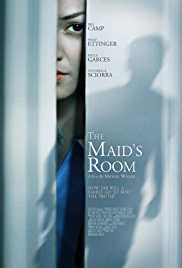

The Call (2013) ['Crime', 'Drama', 'Horror']


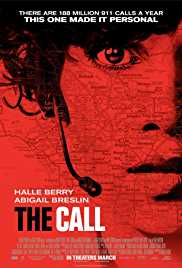

The Man Who Knew Infinity (2015) ['Biography', 'Drama']


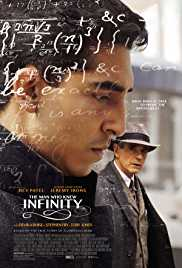

I Don't Know How She Does It (2011) ['Comedy', 'Romance']


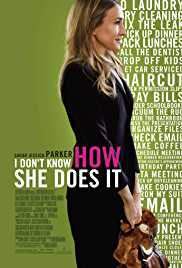

In [10]:
myitem_mov=itempred(userdat,customentry)


from IPython.display import Image
for pred1 in myitem_mov:
    print(pred1,mov[mov['movie']==pred1]['genres'].values[0])
    
    display(Image(filename = "C:\\Users\\Jayant\\Desktop\\precog\\Posters\\" + str(pred1.replace(":", "").replace("?",""))+".jpg", width=100, height=100))
    

In [82]:
# import ipywidgets as widgets
# import IPython.display as display
# ## Read images from file (because this is binary, maybe you can find how to use ByteIO) but this is more easy
# for pred1 in myitem_mov:
#     print(pred1,mov[mov['movie']==pred1]['genres'].values[0])
    
    
#     img1 = open("C:\\Users\\Jayant\\Desktop\\precog\\Posters\\" + str(pred1)+ ".jpg", 'rb').read()
                
#     img2 = open("C:\\Users\\Jayant\\Desktop\\precog\\Posters\\" + str(pred1)+".jpg", 'rb').read()
# ## Create image widgets. You can use layout of ipywidgets only with widgets.
# ## Set image variable, image format and dimension.
#     wi1 = widgets.Image(value=img1, format='png', width=100, height=20)
#     wi2 = widgets.Image(value=img2, format='png', width=100, height=20)
# ## Side by side thanks to HBox widgets
#     sidebyside = widgets.HBox([wi1, wi2])
# ## Finally, show.
#     display.display(sidebyside)

In [924]:
################

# matrix factorisation

In [21]:
mov=pd.read_csv("C:\\Users\\Jayant\\Desktop\\precog\\precog_imdb300.csv")
userdat=pd.read_csv("C:\\Users\\Jayant\\Desktop\\precog\\itemitemuserdat.csv")
userdat.tail()

,userid,Moneyball (2011),Open Water (2003),Adaptation. (2002),The Cove (2009),Top Five (2014),Winter's Tale (2014),Jupiter Ascending (2015),La sindrome di Stendhal (1996),Paparazzi (2004),...,Lilo & Stitch (2002),Blockers (2018),A Beautiful Mind (2001),Simon Sez (1999),Southland Tales (2006),The Hitcher (2007),War Room (2015),La flor de mi secreto (1995),Two for the Money (2005),Liam (2000)
125,325,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,...,4.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0
126,326,1.0,0.0,0.0,4,0,0.0,0.0,0.0,0,...,0.0,0,4.5,0,0,0.0,0.0,0.0,0.0,0
127,372,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,...,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0
128,419,0.0,4.5,0.0,4,0,0.0,0.0,0.0,0,...,0.0,0,3.5,0,0,0.0,0.0,0.0,0.0,0
129,420,0.0,0.0,4.0,0,0,0.0,0.0,0.0,0,...,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0


In [ ]:
count=0
from IPython.display import Image
for pred1 in index_movie_mapping.values():
    print('\033[1m',count,'\033[0m',"||",pred1,mov[mov['movie']==pred1]['genres'].values[0])
    count=count+1
    display(Image(filename = "C:\\Users\\Jayant\\Desktop\\precog\\Posters\\" + str(pred1.replace(":", "").replace("?",""))+".jpg", width=100, height=100))

In [23]:
m=[]
like=[]
for x in range(1,5):
    
    print("\033[1m",x,"--Enter Movie number you have seen and rate them from 1 to 5","\033[0m")
    m.append(int(input("Enter Movie No.#-->")))
    like.append(int(input("Plese Rate it!-->")))
    print("")

 1 --Enter Movie number you have seen and rate them from 1 to 5 
Enter Movie No.#-->3
Plese Rate it!-->3

 2 --Enter Movie number you have seen and rate them from 1 to 5 
Enter Movie No.#-->4
Plese Rate it!-->4

 3 --Enter Movie number you have seen and rate them from 1 to 5 
Enter Movie No.#-->5
Plese Rate it!-->5

 4 --Enter Movie number you have seen and rate them from 1 to 5 
Enter Movie No.#-->6
Plese Rate it!-->2



In [24]:
temp_name=list(userdat.columns)
temp_name.remove('userid')


index_movie_mapping=dict(enumerate(temp_name))
customentry=[0 for i in range(300)]
###########
#taking value from ui
#debugging
# m=[55,5,90,8]
# customentry[m[0]]=5
# customentry[m[1]]=3
# customentry[m[2]]=3
# customentry[m[3]]=1

customentry[m[0]]=like[0]
customentry[m[1]]=like[1]
customentry[m[2]]=like[2]
customentry[m[3]]=like[3]

userid=70801
customentry.insert(0,userid)
userdat.loc[130] = customentry 

In [25]:
given_rating = userdat.loc[130].dropna()
#130 is my user index and 70801 is userid
delete_temp=given_rating[given_rating.values!=0]
del delete_temp['userid']
delete_temp# movies i have rated

The Cove (2009)             3.0
Top Five (2014)             4.0
Winter's Tale (2014)        5.0
Jupiter Ascending (2015)    2.0
Name: 130, dtype: float64

In [29]:
from scipy.sparse.linalg import svds
userdatmatrix= userdat.drop('userid', axis = 1).as_matrix()
userdatmatrix

array([[ 4.5,  3. ,  5. , ...,  0. ,  0. ,  2. ],
       [ 4. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 3.5,  0. ,  3. , ...,  0. ,  0. ,  0. ],
       ..., 
       [ 0. ,  4.5,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  4. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [30]:
user_ratings_mean = np.mean(userdatmatrix, axis = 1)
demeaned = userdatmatrix - user_ratings_mean.reshape(-1, 1)
#includes cuatom user too

In [31]:
u, sigma, Vt = svds(demeaned, k = 60)
sigma = np.diag(sigma)
predicted_ratings = np.dot(np.dot(u, sigma), Vt) + user_ratings_mean.reshape(-1, 1)


In [369]:
#130 is my user index manually entried


In [32]:

df_preds = pd.DataFrame(predicted_ratings, columns = index_movie_mapping.values())
df_preds.tail()

,Moneyball (2011),Open Water (2003),Adaptation. (2002),The Cove (2009),Top Five (2014),Winter's Tale (2014),Jupiter Ascending (2015),La sindrome di Stendhal (1996),Paparazzi (2004),EverAfter (1998),...,Lilo & Stitch (2002),Blockers (2018),A Beautiful Mind (2001),Simon Sez (1999),Southland Tales (2006),The Hitcher (2007),War Room (2015),La flor de mi secreto (1995),Two for the Money (2005),Liam (2000)
126,1.154932,0.215678,0.211554,1.504033,0.289693,0.210497,-0.028462,0.028479,0.007849,-0.120619,...,-0.102155,0.215094,4.045835,0.005869,-0.043594,0.217643,0.017720,0.101719,-0.185213,0.001640
127,-0.086349,-0.107620,0.274957,-0.212592,-0.140119,-0.133045,-0.188711,0.003844,-0.079765,0.510759,...,0.140521,0.029793,-0.052483,-0.022917,0.132745,0.018472,-0.017913,-0.058743,0.162298,0.108391
128,-0.038247,2.116270,-0.108340,2.498879,0.691933,0.493782,0.085429,-0.171846,-0.118858,-0.516710,...,0.527370,0.376655,3.899017,0.075372,0.173983,0.009225,0.060677,0.124274,0.197868,0.086104
129,-0.295119,0.008192,2.672694,0.118614,0.103391,0.068797,0.064168,-0.024013,-0.173737,-0.026177,...,0.168678,0.135195,0.088667,0.014977,0.043627,-0.240018,0.004028,-0.193776,0.094938,-0.090785
130,-0.118960,0.410478,-0.125152,0.972971,0.682317,0.466530,0.239288,-0.008226,-0.064177,-0.205006,...,0.173553,0.099586,0.019378,0.141829,-0.012578,-0.039080,0.085589,0.065994,0.091977,0.028824


In [33]:
def recommend_matrixmov(ratings_df,movies_df):
    
    user_data = ratings_df[ratings_df.userid == (userid)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'movieid', right_on = 'movieid').sort_values(['rating'], ascending=False))
    
    sp = df_preds.iloc[130].sort_values(ascending=False)
                 
   
    top_select = (movies_df[~movies_df['movieid'].isin(user_full['movieid'])].merge(pd.DataFrame(sp).reset_index(), how = 'left',
         
               left_on = 'movieid',right_on = 'movieid').rename(columns = {130: 'Predictions'}).sort_values('Predictions', ascending = False).
                       iloc[:4, :-1])#change 4 to see top numbr of movie recos
                      
               
    return top_select

In [ ]:
top_recos = recommend_matrixmov(ratings_df,movies_df)
top_recos

In [ ]:
########################################################################

In [5]:

ratings.head()

,userid,movid,rating
0,6,11,4.0
1,6,17,4.0
2,6,207,4.0
3,6,225,4.0
4,6,435,3.0


## user user filtering 

In [51]:
mov.head()

,Unnamed: 0,genres,imdb,imdb_id,metascore,movid,movie,plot,votes,year
0,0,"['Biography', 'Drama', 'Sport']",7.6,1210166,87,89492,Moneyball (2011),Oakland A's general manager Billy Beane's succ...,320711,2011
1,1,"['Adventure', 'Drama', 'Horror']",5.7,374102,63,27822,Open Water (2003),Based on the true story of two scuba divers ac...,47529,2003
2,2,"['Comedy', 'Drama']",7.7,268126,83,5902,Adaptation. (2002),A lovelorn screenwriter becomes desperate as h...,163178,2002
3,3,"['Documentary', 'Crime']",8.4,1313104,84,71462,The Cove (2009),"Using state-of-the-art equipment, a group of a...",44744,2009
4,4,"['Comedy', 'Romance']",6.4,2784678,81,118924,Top Five (2014),A comedian tries to make it as a serious actor...,24539,2014


In [11]:
mov=pd.read_csv("C:\\Users\\Jayant\\Desktop\\precog\\precog_imdb300.csv")
userdat=pd.read_csv("C:\\Users\\Jayant\\Desktop\\precog\\itemitemuserdat.csv")
userdat.tail()


,userid,Moneyball (2011),Open Water (2003),Adaptation. (2002),The Cove (2009),Top Five (2014),Winter's Tale (2014),Jupiter Ascending (2015),La sindrome di Stendhal (1996),Paparazzi (2004),...,Lilo & Stitch (2002),Blockers (2018),A Beautiful Mind (2001),Simon Sez (1999),Southland Tales (2006),The Hitcher (2007),War Room (2015),La flor de mi secreto (1995),Two for the Money (2005),Liam (2000)
125,325,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,...,4.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0
126,326,1.0,0.0,0.0,4,0,0.0,0.0,0.0,0,...,0.0,0,4.5,0,0,0.0,0.0,0.0,0.0,0
127,372,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,...,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0
128,419,0.0,4.5,0.0,4,0,0.0,0.0,0.0,0,...,0.0,0,3.5,0,0,0.0,0.0,0.0,0.0,0
129,420,0.0,0.0,4.0,0,0,0.0,0.0,0.0,0,...,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0


In [ ]:
count=0
from IPython.display import Image
for pred1 in index_movie_mapping.values():
    print('\033[1m',count,'\033[0m',"||",pred1,mov[mov['movie']==pred1]['genres'].values[0])
    count=count+1
    display(Image(filename = "C:\\Users\\Jayant\\Desktop\\precog\\Posters\\" + str(pred1.replace(":", "").replace("?",""))+".jpg", width=100, height=100))

In [12]:
m=[]
like=[]
for x in range(1,5):
    
    print("\033[1m",x,"--Enter Movie number you have seen and rate them from 1 to 5","\033[0m")
    m.append(int(input("Enter Movie No.#-->")))
    like.append(int(input("Plese Rate it!-->")))
    print("")

 1 --Enter Movie number you have seen and rate them from 1 to 5 
Enter Movie No.#-->2
Plese Rate it!-->3

 2 --Enter Movie number you have seen and rate them from 1 to 5 
Enter Movie No.#-->4
Plese Rate it!-->5

 3 --Enter Movie number you have seen and rate them from 1 to 5 
Enter Movie No.#-->6
Plese Rate it!-->2

 4 --Enter Movie number you have seen and rate them from 1 to 5 
Enter Movie No.#-->88
Plese Rate it!-->3



In [13]:
# np.savetxt("foo.csv", user_similarity, delimiter=",")
customentry=[0 for i in range(300)]
###########
#taking value from ui of indexes and values

#130 is my user index and 70801 is userid

#m=[55,5,90,8]
customentry[m[0]]=like[0]
customentry[m[1]]=like[1]
customentry[m[2]]=like[2]
customentry[m[3]]=like[3]
##########


userid=70801
customentry.insert(0,userid)
userdat.loc[130] = customentry 

In [296]:
# userdat.tail()


In [14]:
given_rating = userdat.loc[130].dropna()
#130 is my user index and 70801 is userid
delete_temp=given_rating[given_rating.values!=0]
del delete_temp['userid']
delete_temp# movies i have rated

Adaptation. (2002)                                           3.0
Top Five (2014)                                              5.0
Jupiter Ascending (2015)                                     2.0
Il divo - La spettacolare vita di Giulio Andreotti (2008)    3.0
Name: 130, dtype: float64

In [15]:
userdatmatrix= userdat.drop('userid', axis = 1).as_matrix()
userdatmatrix.shape

(131, 300)

In [16]:
correlation_matrix = userdat.set_index("userid", drop = True)
correlation_matrix.T.corr()

user_similarity = correlation_matrix.T.corr().as_matrix()



In [17]:
def predict_user(userdatmatrix, user_similarity):
    
    mean_user_rating = userdatmatrix.mean(axis=1)

    ratings_diff = (userdatmatrix - mean_user_rating[:, np.newaxis])
    denom=np.array([np.abs(user_similarity).sum(axis=1)]).T
    pred = mean_user_rating[:, np.newaxis] + user_similarity.dot(ratings_diff) /denom
    return pred

user_prediction = predict_user(userdatmatrix, user_similarity)

In [293]:

# user_prediction[130].max()
# indices = np.where(user_prediction[130] == user_prediction[130].max())
# indices

In [18]:
from operator import itemgetter
temp_map=dict(enumerate(user_prediction[130]))

temp_map=sorted(temp_map.items(), key=itemgetter(1),reverse=True)
top_10=[index for index,value in temp_map][0:10]
#print(top_10)
final_4=[]
count=0
for x in top_10:
    if count==4:
        break
    if x in m:
        continue
    else:
        final_4.append(x)
        count=count+1
        
        
user_10_mov=[index_movie_mapping[f] for f in top_10]  
# user_10_mov


temp_name=list(userdat.columns)
temp_name.remove('userid')


index_movie_mapping=dict(enumerate(temp_name))
#[k for k,v in a.items() if v == b]

user_4_mov=[index_movie_mapping[f] for f in final_4]

In [19]:
from IPython.display import HTML, display


Top 4 recommendations:
Secretary (2002) ['Comedy', 'Drama', 'Romance']


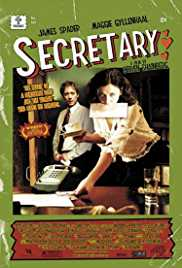

The Life Aquatic with Steve Zissou (2004) ['Action', 'Adventure', 'Comedy']


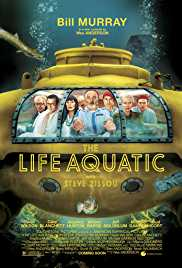

The Player (1992) ['Comedy', 'Crime', 'Drama']


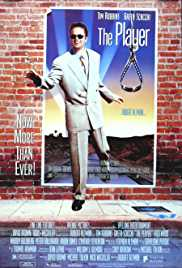

Wonder Boys (2000) ['Comedy', 'Drama']


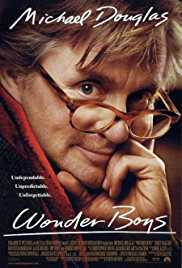

In [20]:
from IPython.display import Image
print('\033[1m'+"Top 4 recommendations:"+'\033[0m')

for pred in user_4_mov:
    
    print(pred,mov[mov['movie']==pred]['genres'].values[0])
    display(Image(filename = "C:\\Users\\Jayant\\Desktop\\precog\\Posters\\" + str(pred.replace(":", "").replace("?",""))+".jpg", width=100, height=100))
    

In [40]:
 
########################references used#######3
# https://towardsdatascience.com/various-implementations-of-collaborative-filtering-100385c6dfe0
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.svds.html
#https://en.wikipedia.org/wiki/Collaborative_filtering
#http://recommender-systems.org/collaborative-filtering/
#https://pandas.pydata.org/pandas-docs/stable/
#https://www.analyticsvidhya.com/blog/2016/06/quick-guide-build-recommendation-engine-python/
#https://data36.com/pandas-tutorial-3-important-data-formatting-methods-merge-sort-reset_index-fillna/